<a href="https://colab.research.google.com/github/CGproject-record/hrv_heatmap_and_corrplot/blob/main/Sepsis3_heatmap_and_corrplot_20230912%20colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages('corrplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
install.packages('dendextend')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘viridis’




In [7]:
install.packages('gplots')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’




corrplot 0.92 loaded



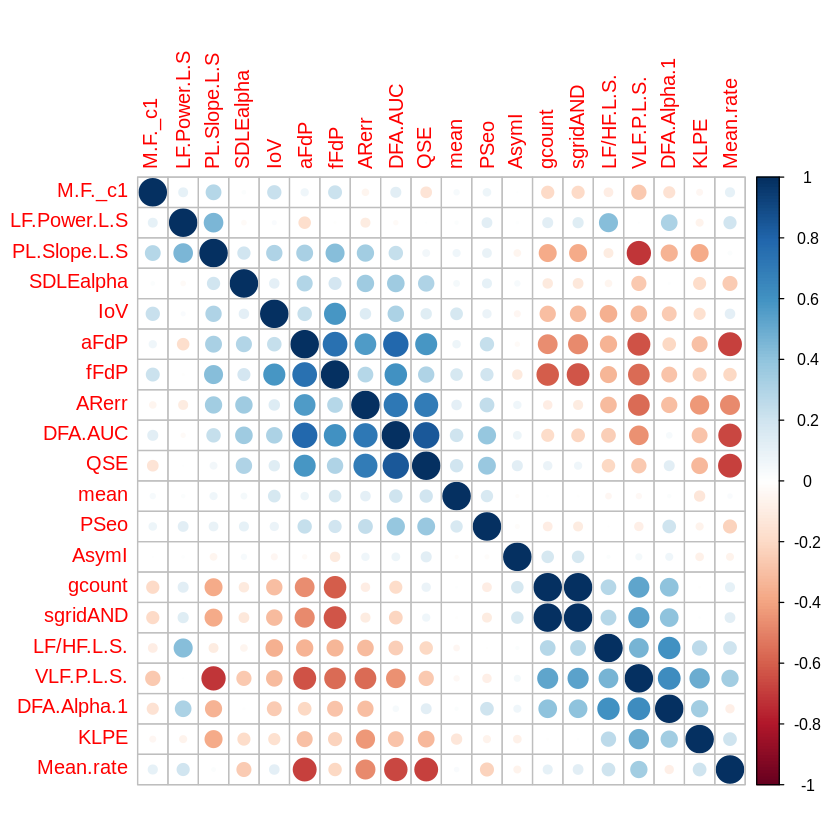

In [3]:
# generate corrplot
Y<-"sofa3m"
data <- read.csv('https://raw.githubusercontent.com/CGproject-record/hrv_heatmap_and_corrplot/main/Sepsis_top20_data.csv',header = T)
data2 <- data[,-1]

library(stringr)
##====== corplot=======================================
data3<-data2
check<-nchar(names(data2))
names(data3)[check>11]<-c(
  "LF/HF.L.S.",
  "LF.Power.L.S",
  "M.F._c1",
  "VLF.P.L.S.",
  "PL.Slope.L.S"

)


# [2]<-"LF/HF.L.S."
library(corrplot)
M <- cor(data3)


# sort corrplot
orderind<-corrMatOrder(M, order = c("hclust"),
                       hclust.method = c("mcquitty"))

order_M<-M[orderind,orderind]
corrplot(order_M, method = "circle")



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




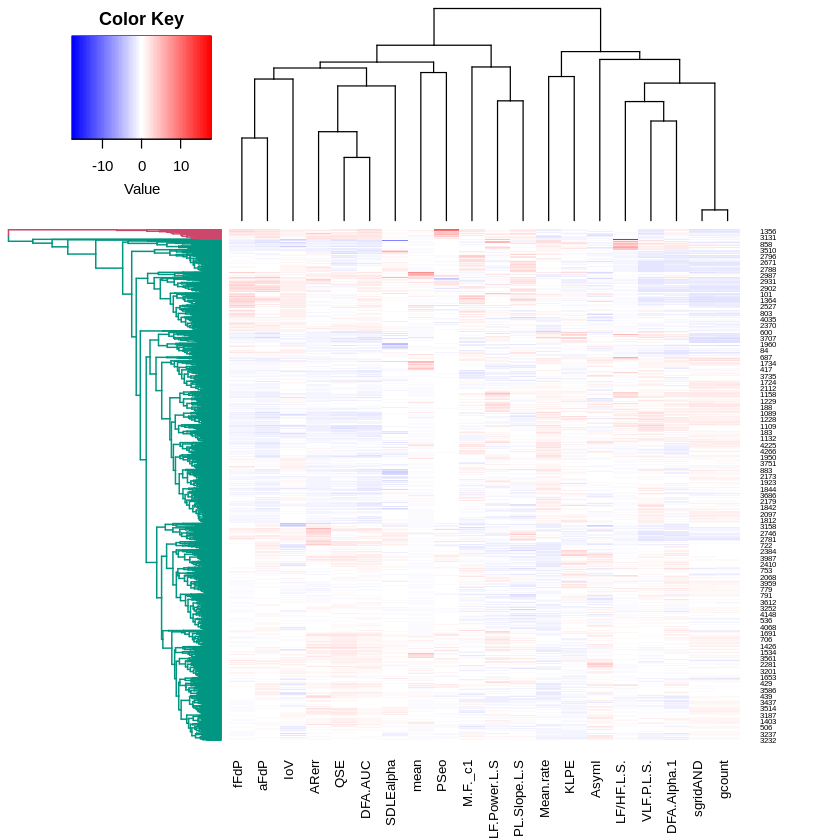

In [8]:
data3<-data2
names(data3)[check>11]<-c(
  "LF/HF.L.S.",
  "LF.Power.L.S",
  "M.F._c1",
  "VLF.P.L.S.",
  "PL.Slope.L.S"

)

df <- as.matrix((scale(data3)))





library(dendextend)# order for rows
Rowv <- data3 %>% scale %>% dist('euclidean') %>%
  hclust('mcquitty') %>% as.dendrogram %>%
  set("branches_k_color", k = 2) %>%
  set("branches_lwd", 1.2) %>% ladderize# Order for columns#



library(gplots)

heatmap.2(df, scale = "none", col = bluered(100), Rowv = Rowv, trace = "none", density.info = "none",cexCol =0.8)

